In [3]:
#import pyodbc

%matplotlib inline
#from Networkmeeting3 import lhplanning
import numpy as np
import pandas as pd
from IPython import display
from datetime import datetime, date, timedelta
from dateutil import parser
from itertools import permutations
from shapely.geometry import Point, Polygon, LineString, LinearRing
#import geopandas as gpd
from collections import Counter
#import mplleaflet as mpll
import matplotlib.pyplot as plt
crs = {'init': 'epsg:4326'} 
startdate=str(datetime.today().date()-timedelta(days=8))
startdate1=str(datetime.today().date()-timedelta(days=15))
startdate2=str(datetime.today().date()-timedelta(days=31))
enddate=str(datetime.today().date()-timedelta(days=1))
enddate2=str(datetime.today().date())
startdate3=str(datetime.today().date()-timedelta(days=1))
startdate5=str(datetime.today().date())
startdate4=str(datetime.today().date().replace(day=1))
enddate=str (datetime.today().date()-timedelta(days=1))

import folium
from folium import Choropleth,Circle,Marker
from folium.plugins import HeatMap,MarkerCluster
import seaborn as sns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('mode.chained_assignment','warn')

In [4]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#pd.set_option('mode.chained_assignment','warn')

In [5]:
pwd

'/Users/slackroo/Data_science/delhivery/check_old'

In [7]:
df1=pd.read_excel('excel_csv/RouteDbData.xlsx',engine='openpyxl')
df2=pd.read_csv('excel_csv/Central_dump.csv')

df3=pd.read_excel('excel_csv/Bharthal_Routes.xlsx',engine='openpyxl')

In [8]:
df3[:2]

,Route No,Route-DCs,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Distance,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Travel Time,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Route Timings,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Distance till Last DC,Last DC to MFC
0,NaN,Origin Point,DC 1,DC 2,DC 3,DC 4,DC 5,DC 6,DC 7,DC 8,Origin Point,Distance 1,Distance 2,Distance 3,Distance 4,Distance 5,Distance 6,Distance 7,Distance 8,Distance Back,Travel Time 1,Travel Time 2,Travel Time 3,Travel Time 4,Travel Time 5,Travel Time 6,Travel Time 7,Travel Time 8,Travel Time Back,Origin Dispatch Time,ETA DC 1,ETA DC 2,ETA DC 3,ETA DC 4,ETA DC 5,ETA DC 6,ETA DC 7,ETA DC 8,ETA Origin,NaN,NaN
1,1.0,Bharthal,Delhi_Amberhai_D,Delhi_ChhotialPalam_D,Delhi_Lajwanti,Delhi_SubhashNagar_D,Delhi_MyapuriPhase1_D,Delhi_MotiNgr_D,Delhi_Shadipur_D,Delhi_Karolbagh_D,Bharthal,6.322,3.803,4.114,4.648,1.751,5.098,4.638,4.97,30.094,45,30,30,30,30,30,30,30,105,13:00:00,13:45:00,14:15:00,14:45:00,15:15:00,15:45:00,16:15:00,16:45:00,17:15:00,19:00:00,35.344,30.094


In [9]:
x=['Route_no','Origin Point','DC 1','DC 2','DC 3','DC 4','DC 5','DC 6','DC 7','DC 8','Origin Point','Distance 1','Distance 2','Distance 3','Distance 4','Distance 5','Distance 6','Distance 7','Distance 8','Distance Back','Travel Time 1','Travel Time 2','Travel Time 3','Travel Time 4','Travel Time 5','Travel Time 6','Travel Time 7','Travel Time 8','Travel Time Back','Origin Dispatch Time','ETA DC 1','ETA DC 2','ETA DC 3','ETA DC 4','ETA DC 5','ETA DC 6','ETA DC 7','ETA DC 8','ETA Origin', 'Distance till Last DC', 'Last DC to MFC']

In [10]:
df3.columns=x

In [11]:
df3=df3.drop(0).reset_index()

In [12]:
df3.drop('index',axis=1,inplace=True)

In [13]:
DC=pd.DataFrame([j for x in df3.iloc[:,2:10].values for j in x if str(j) != 'nan'],columns=['DC'])

In [14]:
DC.drop_duplicates(inplace=True)

In [15]:
DC=DC.merge(df2[['center_name','property_lat','property_long','center_pincode']],left_on='DC',right_on='center_name')

In [16]:
one=[i for i in df3.iloc[0,2:10].values if i == i]

In [17]:
DC['lat_long']=list(zip(DC['property_lat'],DC['property_long']))

In [18]:
one1=DC[DC['DC'].isin(one)]

In [19]:
DC.drop('DC',axis=1,inplace=True)

In [20]:
DC.loc[51]=['Bharthal',28.540562,77.05089,110077,(28.540562,77.05089)]

In [21]:
org_cluster_dict = dict(enumerate([list(x) for x in df3.iloc[:,2:10].values]))

new_d=d = {val:key for key, lst in org_cluster_dict.items() for val in lst}
        

In [22]:
DC['org_cluster']=DC['center_name'].map(new_d)

In [23]:
DC.sort_values('org_cluster').to_clipboard()

In [24]:
DC.rename(columns={'property_lat':'Lattitude','property_long':'Longitude'},inplace=True)

In [25]:
DC

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0
3,Delhi_SubhashNagar_D,28.634047,77.119240,110027,"(28.634047, 77.11924)",0.0
4,Delhi_MyapuriPhase1_D,28.631940,77.128330,110064,"(28.63194, 77.12833)",0.0
5,Delhi_MotiNgr_D,28.662071,77.131874,110015,"(28.662071, 77.131874)",0.0
6,Delhi_Shadipur_D,28.653624,77.154205,110008,"(28.653624, 77.154205)",0.0
7,Delhi_Karolbagh_D,28.654518,77.187500,110005,"(28.654518, 77.1875)",0.0
8,Delhi_Samlkha_D,28.535456,77.088715,110037,"(28.535456, 77.088715)",1.0
9,Gurgaon_Central_D_16,28.498924,77.063225,122015,"(28.498924, 77.063225)",1.0


In [26]:
m_1 = folium.Map(location=[28.17,76.86],tiles=" OpenStreetMap",zoom_start=6)
radius = 2000
for idx,row in DC.iterrows():
    if row['center_name'] == 'Bharthal':
        folium.Circle(radius=radius,location=[row['Lattitude'],row['Longitude']],fill=False,color='red').add_to(m_1)
        Marker([row['Lattitude'],row['Longitude']],
               icon=folium.Icon(color='green'),
               popup=row['center_name']).add_to(m_1)
            
    else:
        colors=['red', 'blue', 'purple', 'orange', 'darkred', 'lightred', 'beige','darkgreen']
        for i in range(0,8):
            if row['org_cluster']==i:
                Marker([row['Lattitude'],row['Longitude']],
                icon=folium.Icon(color=colors[i]),
                popup=row['center_name']).add_to(m_1)
# for idx,row in DC.iterrows():
#     if row['center_name'] == 'DELH':
#         folium.Circle(radius=radius,location=[row['Lattitude'],row['Longitude']],fill=False,color='blue').add_to(m_1)
#         Marker([row['Lattitude'],row['Longitude']],
#                icon=folium.Icon(color='green'),
#                popup=row['center_name']).add_to(m_1)
#     else:
#         Marker([row['Lattitude'],row['Longitude']],
#            icon=folium.Icon(color='blue'),
#            popup=row['center_name']).add_to(m_1)
m_1

In [27]:
df2[df2['center_name'].isin(list(DC.center_name))]

,center_code,center_name,hq_name,city,facility,status,region,state,country,property_lat,property_long,property_id,center_address,center_phone,center_pincode,enable_bag_guide,is_bagging_allowed,sort_code,region1,parent_center,property_facility_id
561,INDLAMBZ,Delhi_DilshdGrdn_D,Delhi_DilshdGrdn_D (Delhi),Delhi,DC,Active,North,Delhi,India,28.679785,77.316410,c9130424-c2b0-45b6-bc3f-298290ca2a45,"P.No-184, PVT No.4, 184/4, Dilshad Garden Delhi-110095",8.826537e+09,110095,False,True,DLH/DDG,North,Delhi_Patparganj_DPC,8775c382-b62d-4b05-80bc-f1d2f75933b4
942,INDLAAFH,Delhi_Patparganj_D,Delhi_Patparganj_D (Delhi),Delhi,DC,Active,North,Delhi,India,28.638735,77.309135,360d76df-d1e9-4f23-9591-137a2af02832,Plot no- 3 Patparganj Industrial area near MCD office delhi- 110092,8.983831e+09,110092,False,True,DEL/PGD,North,Delhi_Patparganj_DPC,8775c382-b62d-4b05-80bc-f1d2f75933b4
1274,INDLAQCE,Delhi_Amberhai_D,Delhi_Amberhai_D (Delhi),Delhi,DC,Active,North,Delhi,India,28.577110,77.050360,2e403b74-60d3-41a8-a14e-a3e5a0cdc8db,"Near Hari Flour Mill Dwarka, Sector-19, Amberhai Village,South West Delhi, Delhi-110075",9.555222e+09,110075,False,True,DEL/AMB,North,Delhi_Najafgarh_I,c61c4eb0-d03d-407c-a723-292f3bc057d3
1368,IND122015AAA,Gurgaon_Central_D_16,Gurgaon_Central_D_16 (Haryana),Gurgaon,DC,Active,North,Haryana,India,28.498924,77.063225,1337df6e-6edd-4c07-a2db-829d78a69361,"Plot No 10 8 11, Noble Enclave, Old Delhi Road, Opp Maruti Udyog Limited, Gurugram, Haryana 122015",8.817112e+09,122015,False,True,GGN/CTL,North,GGN_DPC,e29d5044-90a9-4b43-a538-83dd0f7e29d7
1403,IN110009A1B,Delhi_KalyanVhr_D,Delhi_KalyanVhr_D (Delhi),Delhi,DC,Active,North,Delhi,India,28.692911,77.200935,189f3bb8-3f5d-491d-b5c5-91b6a39aac1e,"D-1, Old Gupta Colony, Opp Shani Mandir, Dr. Mukherjee Nagar, North West Delhi, New Delhi 110009",9.582525e+09,110009,False,True,DEL/KVS,North,Delhi_Jahangirpuri_I,6d94f781-0a75-41d7-86ec-eb5a6b8e9132
4041,IND110066AAA,Delhi_Mohammadpur,Delhi_Mohammadpur (Delhi),Delhi,DC,Active,North,Delhi,India,28.565416,77.185616,7e01d5dc-b657-4dc9-adf4-15304b23fbbd,F-128 mohammadpur near Anil super shop new delhi-110066,9.953090e+09,110066,False,True,DEL/MOH,North,Delhi_Kishangarh_DPC,eeed66ee-8b4e-41f9-aabc-d5cb7ec75509
4053,INDLAAFF,Delhi_MalviyaNagar_NDC,Delhi_MalviyaNagar_NDC (Delhi),Delhi,DC,Active,North,Delhi,India,28.509760,77.202370,109da98f-5ad8-4c55-9cd4-0aa7d769ad21,"House Near Shokeen Market, Village Neb Sarai, New Delhi 110068",9.507576e+09,110030,False,True,DEL/NDC,North,Delhi_Kishangarh_DPC,eeed66ee-8b4e-41f9-aabc-d5cb7ec75509
4080,INDLARMM,Delhi_Ghitorni_D,Delhi_Ghitorni_D (Delhi),Delhi,DC,Active,North,Delhi,India,28.499458,77.144070,ac35f6b0-e2fd-4bea-b81c-a09cf1fcc631,"98/9, 100 Futa road, Ghitorni, New Delhi-110030",7.428256e+09,110030,False,True,DEL/TOR,North,Delhi_Kishangarh_DPC,eeed66ee-8b4e-41f9-aabc-d5cb7ec75509
4488,INDLAMXF,Delhi_Mehrauli_D,Delhi_Mehrauli_D (Delhi),Delhi,DC,Active,North,Delhi,India,28.512200,77.177900,224df2f4-df0e-40dd-87af-7abb707cd159,"T-15,WAWRD NUM-8, Mehruli opp graveyard,near shamshi new delhi 110030",9.507576e+09,110030,False,True,DLH/MHL,North,Delhi_Kishangarh_DPC,eeed66ee-8b4e-41f9-aabc-d5cb7ec75509
4583,IND110049AAA,Delhi_shahpurJat,Delhi_shahpurJat (Delhi),Delhi,DC,Active,North,Delhi,India,28.548140,77.211450,e60ccb6e-9444-4fa1-8a62-02185372e5f3,252 Nanak Bhwan Ground floor near Bank of India 110049,8.377023e+09,110049,False,True,DEL/SHA,North,Delhi_Kishangarh_DPC,eeed66ee-8b4e-41f9-aabc-d5cb7ec75509


In [28]:
from sklearn.cluster import KMeans
# create kmeans model/object
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [29]:
DC[:3]

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0


In [30]:
features = DC[['Lattitude','Longitude']]
kmeans.fit(features)
labels = kmeans.labels_
DC['cluster1']= labels
DC.reset_index(drop=True,inplace=True)#.iloc[50]["center_name"]

In [75]:
import folium
m_2 = folium.Map(location=[28.17,76.86],tiles=" OpenStreetMap",zoom_start=6)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]
for idx,row in DC.iterrows():
    if row['center_name'] == 'Bharthal':
        folium.Circle(radius=1000,location=[row['Lattitude'],row['Longitude']],fill=False,color='red').add_to(m_2)
        Marker([row['Lattitude'],row['Longitude']],
               icon=folium.Icon(color='green'),
               popup=row['center_name']).add_to(m_2)
            
    else:
        #colors=['red', 'blue', 'purple', 'orange', 'darkred', 'lightred', 'beige','darkgreen']
        for i in range(0,10):
            if row['cluster1']==i:
                Marker([row['Lattitude'],row['Longitude']],
                icon=folium.Icon(color=colors[i]),
                popup=row['center_name']).add_to(m_2)
m_2

## Distance matrix from google clean up

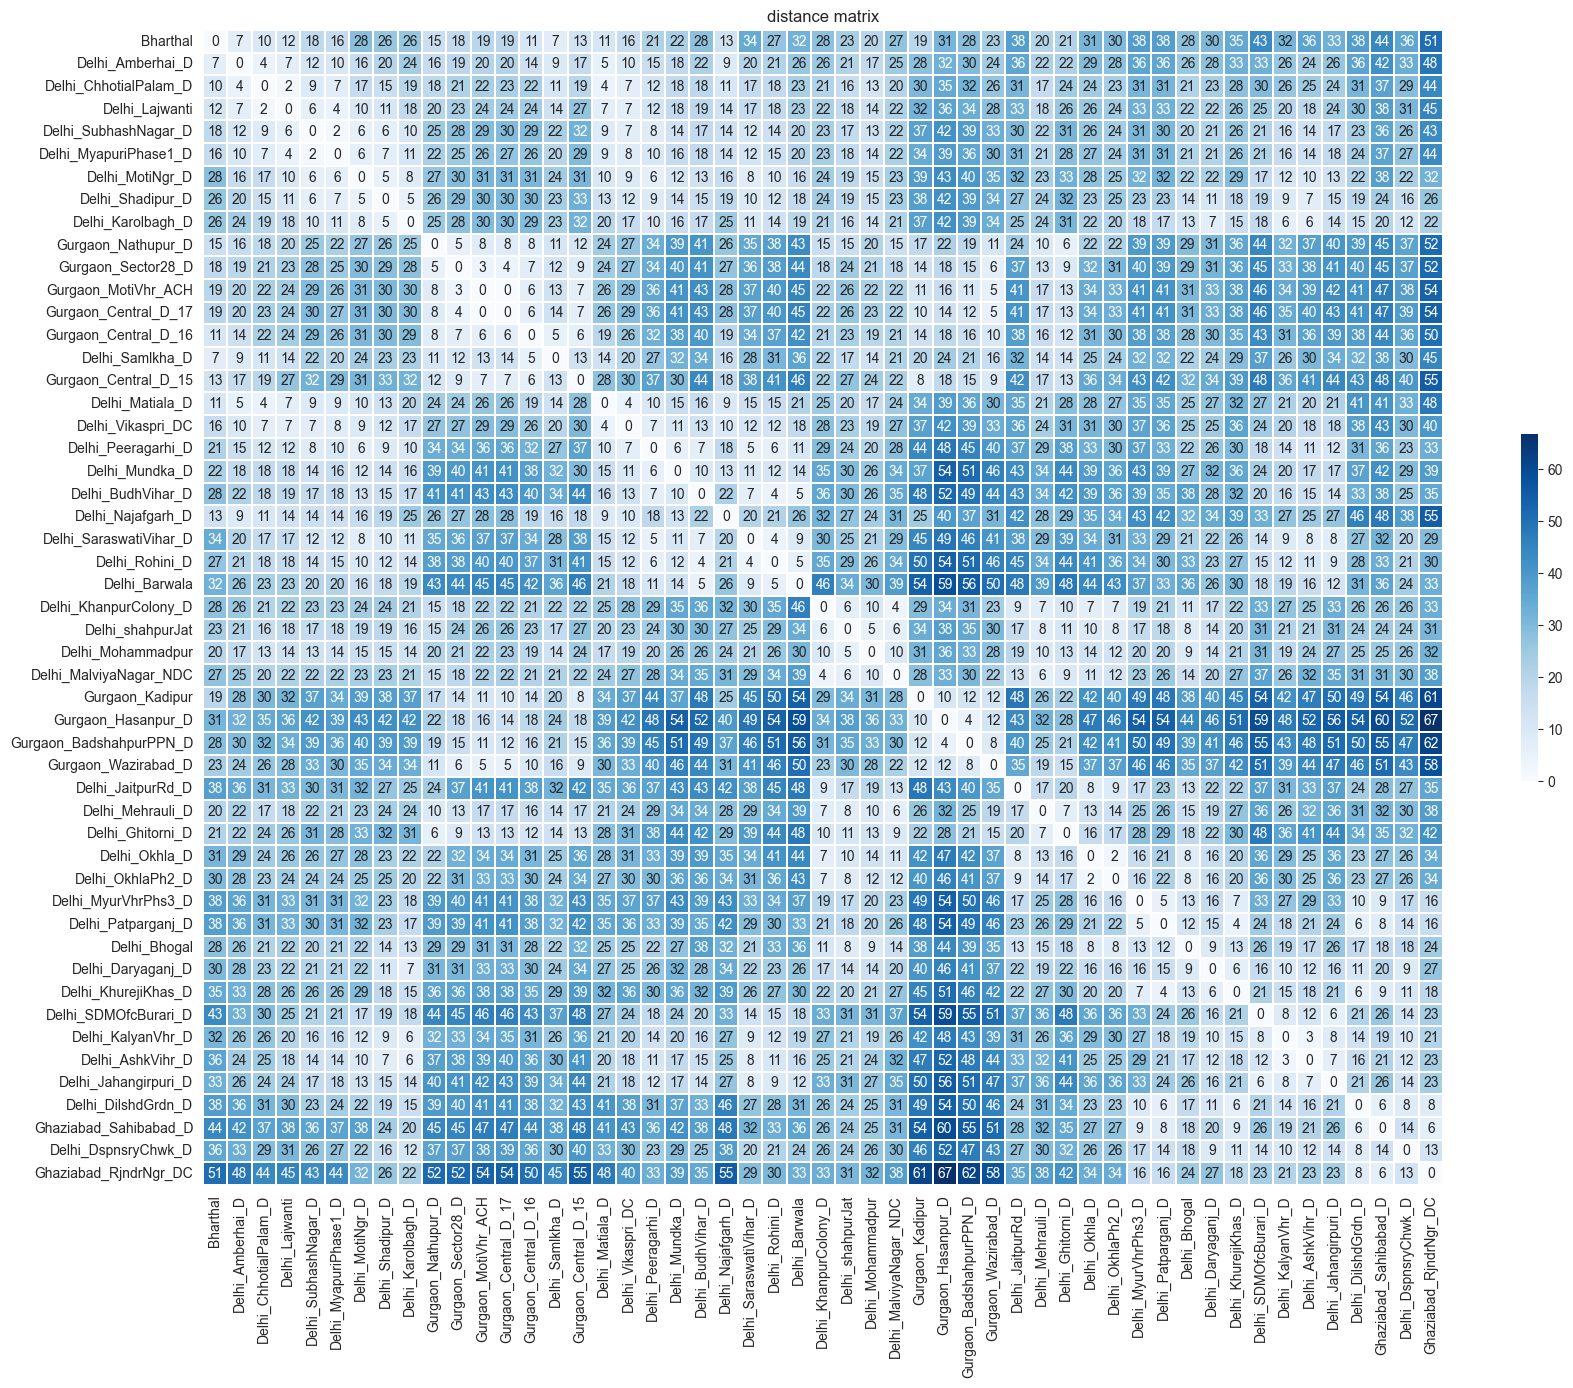

In [83]:
dist= pd.read_csv('excel_csv/MFC_DELH_Dis_tat - Distance.csv')

dist.rename(columns={'Unnamed: 0': 'org'},inplace=True)

dist.set_index('org',inplace=True)

for col in dist.columns:
    dist[col]= dist[col].apply(lambda x: float(x.split()[0]) if type(x)!= float else 0)

np.fill_diagonal(dist.values,0)

X= dist.values

X = X + X.T - np.diag(np.diag(X))

dist_MFC_1= pd.DataFrame(X,columns=dist.columns).set_index(dist.columns)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(dist_MFC_1, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.title('distance matrix')
plt.show()

In [84]:
## Create list of cluster for LP
i=0
cluster = DC[DC['org_cluster']==i]['center_name'].to_list()

In [85]:
cluster

['Delhi_Amberhai_D',
 'Delhi_ChhotialPalam_D',
 'Delhi_Lajwanti',
 'Delhi_SubhashNagar_D',
 'Delhi_MyapuriPhase1_D',
 'Delhi_MotiNgr_D',
 'Delhi_Shadipur_D',
 'Delhi_Karolbagh_D']

In [86]:
dist = dist_MFC_1.loc[['Bharthal']+cluster,['Bharthal']+cluster]

In [87]:
dist

,Bharthal,Delhi_Amberhai_D,Delhi_ChhotialPalam_D,Delhi_Lajwanti,Delhi_SubhashNagar_D,Delhi_MyapuriPhase1_D,Delhi_MotiNgr_D,Delhi_Shadipur_D,Delhi_Karolbagh_D
Bharthal,0.0,7.0,9.9,12.1,17.8,16.5,28.4,26.1,26.1
Delhi_Amberhai_D,7.0,0.0,4.4,6.6,11.7,10.4,16.2,20.0,23.8
Delhi_ChhotialPalam_D,9.9,4.4,0.0,2.2,8.6,7.4,16.8,15.3,19.1
Delhi_Lajwanti,12.1,6.6,2.2,0.0,5.8,4.5,10.3,10.7,17.6
Delhi_SubhashNagar_D,17.8,11.7,8.6,5.8,0.0,1.8,5.8,6.3,10.4
Delhi_MyapuriPhase1_D,16.5,10.4,7.4,4.5,1.8,0.0,6.3,6.7,10.9
Delhi_MotiNgr_D,28.4,16.2,16.8,10.3,5.8,6.3,0.0,4.7,8.2
Delhi_Shadipur_D,26.1,20.0,15.3,10.7,6.3,6.7,4.7,0.0,5.0
Delhi_Karolbagh_D,26.1,23.8,19.1,17.6,10.4,10.9,8.2,5.0,0.0


In [88]:
#Check if array is symetric
np.array_equal(dist,dist.T)

True

In [89]:
dist.index==dist.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [90]:
n_customer = len(dist)-1
n_point = n_customer + 1

In [91]:
import pulp

In [92]:
dist

,Bharthal,Delhi_Amberhai_D,Delhi_ChhotialPalam_D,Delhi_Lajwanti,Delhi_SubhashNagar_D,Delhi_MyapuriPhase1_D,Delhi_MotiNgr_D,Delhi_Shadipur_D,Delhi_Karolbagh_D
Bharthal,0.0,7.0,9.9,12.1,17.8,16.5,28.4,26.1,26.1
Delhi_Amberhai_D,7.0,0.0,4.4,6.6,11.7,10.4,16.2,20.0,23.8
Delhi_ChhotialPalam_D,9.9,4.4,0.0,2.2,8.6,7.4,16.8,15.3,19.1
Delhi_Lajwanti,12.1,6.6,2.2,0.0,5.8,4.5,10.3,10.7,17.6
Delhi_SubhashNagar_D,17.8,11.7,8.6,5.8,0.0,1.8,5.8,6.3,10.4
Delhi_MyapuriPhase1_D,16.5,10.4,7.4,4.5,1.8,0.0,6.3,6.7,10.9
Delhi_MotiNgr_D,28.4,16.2,16.8,10.3,5.8,6.3,0.0,4.7,8.2
Delhi_Shadipur_D,26.1,20.0,15.3,10.7,6.3,6.7,4.7,0.0,5.0
Delhi_Karolbagh_D,26.1,23.8,19.1,17.6,10.4,10.9,8.2,5.0,0.0


In [93]:
%%time

# set problem
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)

# set valiables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# we need to keep track of the order in the tour to eliminate the possibility of subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# set objective function
problem += pulp.lpSum(dist.iloc[:,:9].values[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# set constrains
#same location constraint
for i in range(n_point):
    problem += x[i, i] == 0
#sum of movement from one node to be one(selction)
for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# eliminate subtour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1
            
# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/slackroo/Data_science/UNIV_ai/venv/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/c8c53b1fdaff4950825c92cfee1cf0f2-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/c8c53b1fdaff4950825c92cfee1cf0f2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 88 COLUMNS
At line 678 RHS
At line 762 BOUNDS
At line 860 ENDATA
Problem MODEL has 83 rows, 89 columns and 339 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 41.2333 - 0.00 seconds
Cgl0002I 9 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 56 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 56 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 56 strengthened rows, 0 subs

(1, 'Optimal', 61.0)

In [94]:
print(problem)

tsp_mip:
MINIMIZE
7.0*x_(0,_1) + 9.9*x_(0,_2) + 12.1*x_(0,_3) + 17.8*x_(0,_4) + 16.5*x_(0,_5) + 28.4*x_(0,_6) + 26.1*x_(0,_7) + 26.1*x_(0,_8) + 7.0*x_(1,_0) + 4.4*x_(1,_2) + 6.6*x_(1,_3) + 11.7*x_(1,_4) + 10.4*x_(1,_5) + 16.2*x_(1,_6) + 20.0*x_(1,_7) + 23.8*x_(1,_8) + 9.9*x_(2,_0) + 4.4*x_(2,_1) + 2.2*x_(2,_3) + 8.6*x_(2,_4) + 7.4*x_(2,_5) + 16.8*x_(2,_6) + 15.3*x_(2,_7) + 19.1*x_(2,_8) + 12.1*x_(3,_0) + 6.6*x_(3,_1) + 2.2*x_(3,_2) + 5.8*x_(3,_4) + 4.5*x_(3,_5) + 10.3*x_(3,_6) + 10.7*x_(3,_7) + 17.6*x_(3,_8) + 17.8*x_(4,_0) + 11.7*x_(4,_1) + 8.6*x_(4,_2) + 5.8*x_(4,_3) + 1.8*x_(4,_5) + 5.8*x_(4,_6) + 6.3*x_(4,_7) + 10.4*x_(4,_8) + 16.5*x_(5,_0) + 10.4*x_(5,_1) + 7.4*x_(5,_2) + 4.5*x_(5,_3) + 1.8*x_(5,_4) + 6.3*x_(5,_6) + 6.7*x_(5,_7) + 10.9*x_(5,_8) + 28.4*x_(6,_0) + 16.2*x_(6,_1) + 16.8*x_(6,_2) + 10.3*x_(6,_3) + 5.8*x_(6,_4) + 6.3*x_(6,_5) + 4.7*x_(6,_7) + 8.2*x_(6,_8) + 26.1*x_(7,_0) + 20.0*x_(7,_1) + 15.3*x_(7,_2) + 10.7*x_(7,_3) + 6.3*x_(7,_4) + 6.7*x_(7,_5) + 4.7*x_(7,_6) + 5.0*x

In [95]:
study=DC.loc[DC['center_name'].isin(['Bharthal']+cluster)].copy()#[['Lattitude','Longitude']]

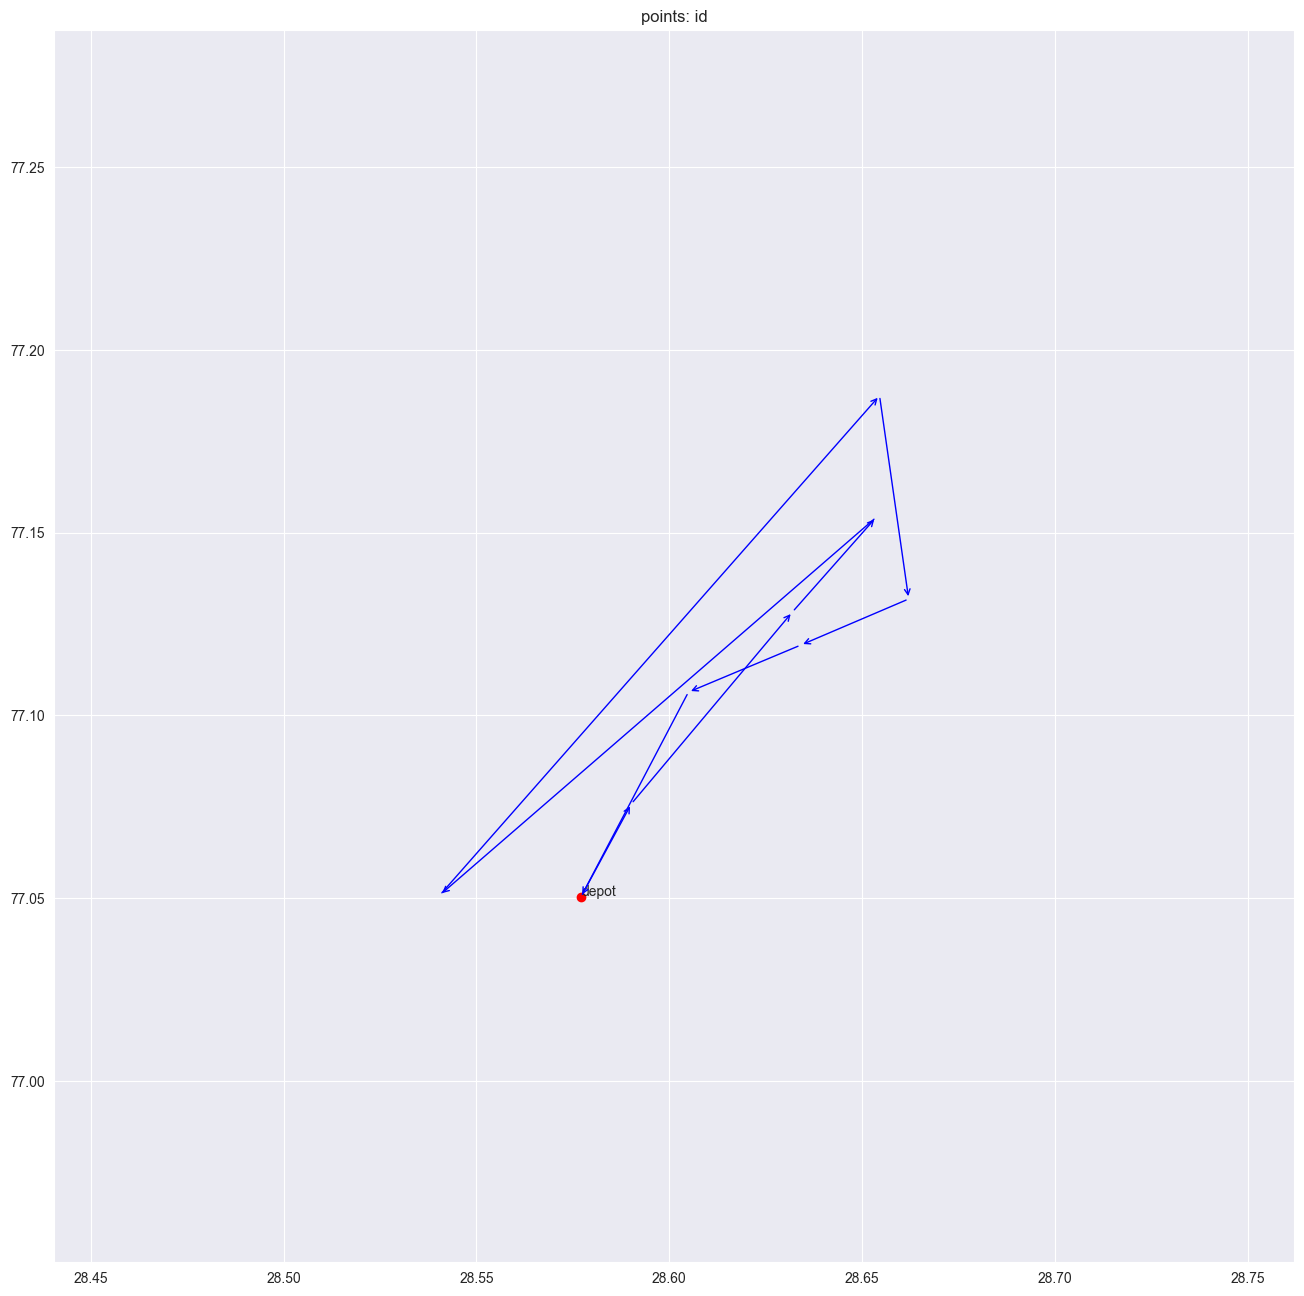

In [96]:
# check TSP problem and optimized route

# draw problem state
plt.figure(figsize=(16, 16))

for i, row in study.iterrows():
    if i==0:
        plt.scatter(row['Lattitude'], row['Longitude'], c='r')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, 'depot')
    elif row['org_cluster']==6:
        plt.scatter(row['Lattitude'], row['Longitude'], c='black')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, f'{i}')
        
plt.xlim([study['Lattitude'].min()-0.1,study['Lattitude'].max()+0.1])
plt.ylim([study['Longitude'].min()-0.1,study['Longitude'].max()+0.1])
plt.title('points: id')
# plt.show()

# draw optimal route
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[study.iloc[j]['Lattitude'], study.iloc[j]['Longitude']], xytext=[study.iloc[i]['Lattitude'], study.iloc[i]['Longitude']], arrowprops=arrowprops)
                
plt.show()

In [131]:
routes

[(0, 1), (1, 4), (2, 0), (3, 2), (4, 6), (5, 3), (6, 50), (7, 5), (50, 7)]

In [135]:
study['numbering']=range(len(study))

In [136]:
re_rout_dict = study['numbering'].to_dict()
re_rout_dict= {v:k for k, v in re_rout_dict.items()}

In [137]:
routes = list(zip(*[iter([re_rout_dict[i]  for j in routes for i in j])]*2))

KeyError: 50

In [139]:
routes

[(0, 1), (1, 4), (2, 0), (3, 2), (4, 6), (5, 3), (6, 50), (7, 5), (50, 7)]

In [109]:
study

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand,numbering
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0,9,NaN,0
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0,9,NaN,1
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0,9,NaN,2
3,Delhi_SubhashNagar_D,28.634047,77.119240,110027,"(28.634047, 77.11924)",0.0,4,NaN,3
4,Delhi_MyapuriPhase1_D,28.631940,77.128330,110064,"(28.63194, 77.12833)",0.0,4,NaN,4
5,Delhi_MotiNgr_D,28.662071,77.131874,110015,"(28.662071, 77.131874)",0.0,4,43.0,5
6,Delhi_Shadipur_D,28.653624,77.154205,110008,"(28.653624, 77.154205)",0.0,4,NaN,6
7,Delhi_Karolbagh_D,28.654518,77.187500,110005,"(28.654518, 77.1875)",0.0,2,NaN,7
50,Bharthal,28.540562,77.050890,110077,"(28.540562, 77.05089)",NaN,7,0.0,8


In [110]:
len(DC)

51

In [140]:
cl_ls=[]
for i, j in routes:
    print(i,j)
    cl_ls.append(f'{DC.iloc[i]["center_name"]}-{DC.iloc[j]["center_name"]}')

0 1
1 4
2 0
3 2
4 6
5 3
6 50
7 5
50 7


In [141]:
clust1=pd.DataFrame(cl_ls,columns=['route'])

In [142]:
clust1['oc']=clust1['route'].apply(lambda x: x.split('-')[0])
clust1['ntc']=clust1['route'].apply(lambda x: x.split('-')[1])

In [143]:
clust1['order_number']=np.nan

In [144]:
def order_function(df,source,dest,n=1):
    if df['order_number'].notna().sum()==len(df):
        return df['order_number']
    else:
        if df['order_number'].isna().sum()==len(df) and dest in df['ntc'].unique():
            df.loc[df['ntc']==dest,['order_number']]=len(df)
            return order_function(df,source,dest,n)
        dfz=df[(df['order_number'].isna())&(df['oc']==source)]
        df.loc[(df['order_number'].isna())&(df['oc']==source),['order_number']]=n
        source=dfz['ntc'].values[0]
        n+=1
        return order_function(df,source,dest,n)

In [145]:
order_function(clust1,'Bharthal','Bharthal')

0    6.0
1    7.0
2    5.0
3    4.0
4    8.0
5    3.0
6    9.0
7    2.0
8    1.0
Name: order_number, dtype: float64

In [146]:
clust1['route_name']=clust1['oc'][0]+'-'+"-".join(clust1.sort_values('order_number')['ntc'].values)

In [147]:
clust1.sort_values('order_number')


,route,oc,ntc,order_number,route_name
8,Bharthal-Delhi_Karolbagh_D,Bharthal,Delhi_Karolbagh_D,1.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
7,Delhi_Karolbagh_D-Delhi_MotiNgr_D,Delhi_Karolbagh_D,Delhi_MotiNgr_D,2.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
5,Delhi_MotiNgr_D-Delhi_SubhashNagar_D,Delhi_MotiNgr_D,Delhi_SubhashNagar_D,3.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
3,Delhi_SubhashNagar_D-Delhi_Lajwanti,Delhi_SubhashNagar_D,Delhi_Lajwanti,4.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
2,Delhi_Lajwanti-Delhi_Amberhai_D,Delhi_Lajwanti,Delhi_Amberhai_D,5.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
0,Delhi_Amberhai_D-Delhi_ChhotialPalam_D,Delhi_Amberhai_D,Delhi_ChhotialPalam_D,6.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
1,Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D,Delhi_ChhotialPalam_D,Delhi_MyapuriPhase1_D,7.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
4,Delhi_MyapuriPhase1_D-Delhi_Shadipur_D,Delhi_MyapuriPhase1_D,Delhi_Shadipur_D,8.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal
6,Delhi_Shadipur_D-Bharthal,Delhi_Shadipur_D,Bharthal,9.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal


In [148]:
DC.loc[DC['center_name']=='Delhi_Amberhai_D','lat_long'].values[0]

(28.57711, 77.05036)

In [149]:
clust1['oc_lat_long']=clust1['oc'].apply(lambda x: x )

In [150]:
clust1

,route,oc,ntc,order_number,route_name,oc_lat_long
0,Delhi_Amberhai_D-Delhi_ChhotialPalam_D,Delhi_Amberhai_D,Delhi_ChhotialPalam_D,6.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_Amberhai_D
1,Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D,Delhi_ChhotialPalam_D,Delhi_MyapuriPhase1_D,7.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_ChhotialPalam_D
2,Delhi_Lajwanti-Delhi_Amberhai_D,Delhi_Lajwanti,Delhi_Amberhai_D,5.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_Lajwanti
3,Delhi_SubhashNagar_D-Delhi_Lajwanti,Delhi_SubhashNagar_D,Delhi_Lajwanti,4.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_SubhashNagar_D
4,Delhi_MyapuriPhase1_D-Delhi_Shadipur_D,Delhi_MyapuriPhase1_D,Delhi_Shadipur_D,8.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_MyapuriPhase1_D
5,Delhi_MotiNgr_D-Delhi_SubhashNagar_D,Delhi_MotiNgr_D,Delhi_SubhashNagar_D,3.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_MotiNgr_D
6,Delhi_Shadipur_D-Bharthal,Delhi_Shadipur_D,Bharthal,9.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_Shadipur_D
7,Delhi_Karolbagh_D-Delhi_MotiNgr_D,Delhi_Karolbagh_D,Delhi_MotiNgr_D,2.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Delhi_Karolbagh_D
8,Bharthal-Delhi_Karolbagh_D,Bharthal,Delhi_Karolbagh_D,1.0,Delhi_Amberhai_D-Delhi_Karolbagh_D-Delhi_MotiNgr_D-Delhi_SubhashNagar_D-Delhi_Lajwanti-Delhi_Amberhai_D-Delhi_ChhotialPalam_D-Delhi_MyapuriPhase1_D-Delhi_Shadipur_D-Bharthal,Bharthal


In [151]:
clust1['oc_lat_long']=clust1['oc'].apply(lambda x: DC.loc[DC['center_name']==x,'lat_long'].values[0] )

In [152]:
clust1['ntc_lat_long']=clust1['ntc'].apply(lambda x: DC.loc[DC['center_name']==x,'lat_long'].values[0] )

In [153]:
DC[:3]

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0,9,NaN
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0,9,NaN
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0,9,NaN


In [154]:
list(zip(clust1.iloc[:,-2:]))

[('oc_lat_long',), ('ntc_lat_long',)]

In [155]:
clust1['routes_lat_long']=list(zip(clust1['oc_lat_long'],clust1['ntc_lat_long']))

In [156]:
x=list(clust1['routes_lat_long'])

In [157]:
routes

[(0, 1), (1, 4), (2, 0), (3, 2), (4, 6), (5, 3), (6, 50), (7, 5), (50, 7)]

In [158]:
x

[((28.57711, 77.05036), (28.590162, 77.07581)),
 ((28.590162, 77.07581), (28.63194, 77.12833)),
 ((28.604965, 77.106384), (28.57711, 77.05036)),
 ((28.634047, 77.11924), (28.604965, 77.106384)),
 ((28.63194, 77.12833), (28.653624, 77.154205)),
 ((28.662071, 77.131874), (28.634047, 77.11924)),
 ((28.653624, 77.154205), (28.540562, 77.05089)),
 ((28.654518, 77.1875), (28.662071, 77.131874)),
 ((28.540562, 77.05089), (28.654518, 77.1875))]

In [159]:
m_3 = folium.Map(location=[28.17,76.86],tiles=" OpenStreetMap",zoom_start=10)
radius = 2000
for idx,row in DC.iterrows():
    if row['center_name'] == 'Bharthal':
        folium.Circle(radius=radius,location=[row['Lattitude'],row['Longitude']],fill=False,color='red').add_to(m_3)
        Marker([row['Lattitude'],row['Longitude']],
               icon=folium.Icon(color='green'),
               popup=row['center_name']).add_to(m_3)
            
    else:
        colors=['red', 'blue', 'purple', 'orange', 'darkred', 'lightred', 'beige','darkgreen']
        for i in range(0,8):
            if row['org_cluster']==i:
                Marker([row['Lattitude'],row['Longitude']],
                icon=folium.Icon(color=colors[i]),
                popup=row['center_name']).add_to(m_3)
folium.PolyLine(locations=x, color="purple").add_to(m_3)

m_3

## MFC - TAT based

In [51]:
tat_df = pd.read_csv('MFC/MFC_DEL_Bhartal/MFC_DELH_Dis_tat - TAT.csv')

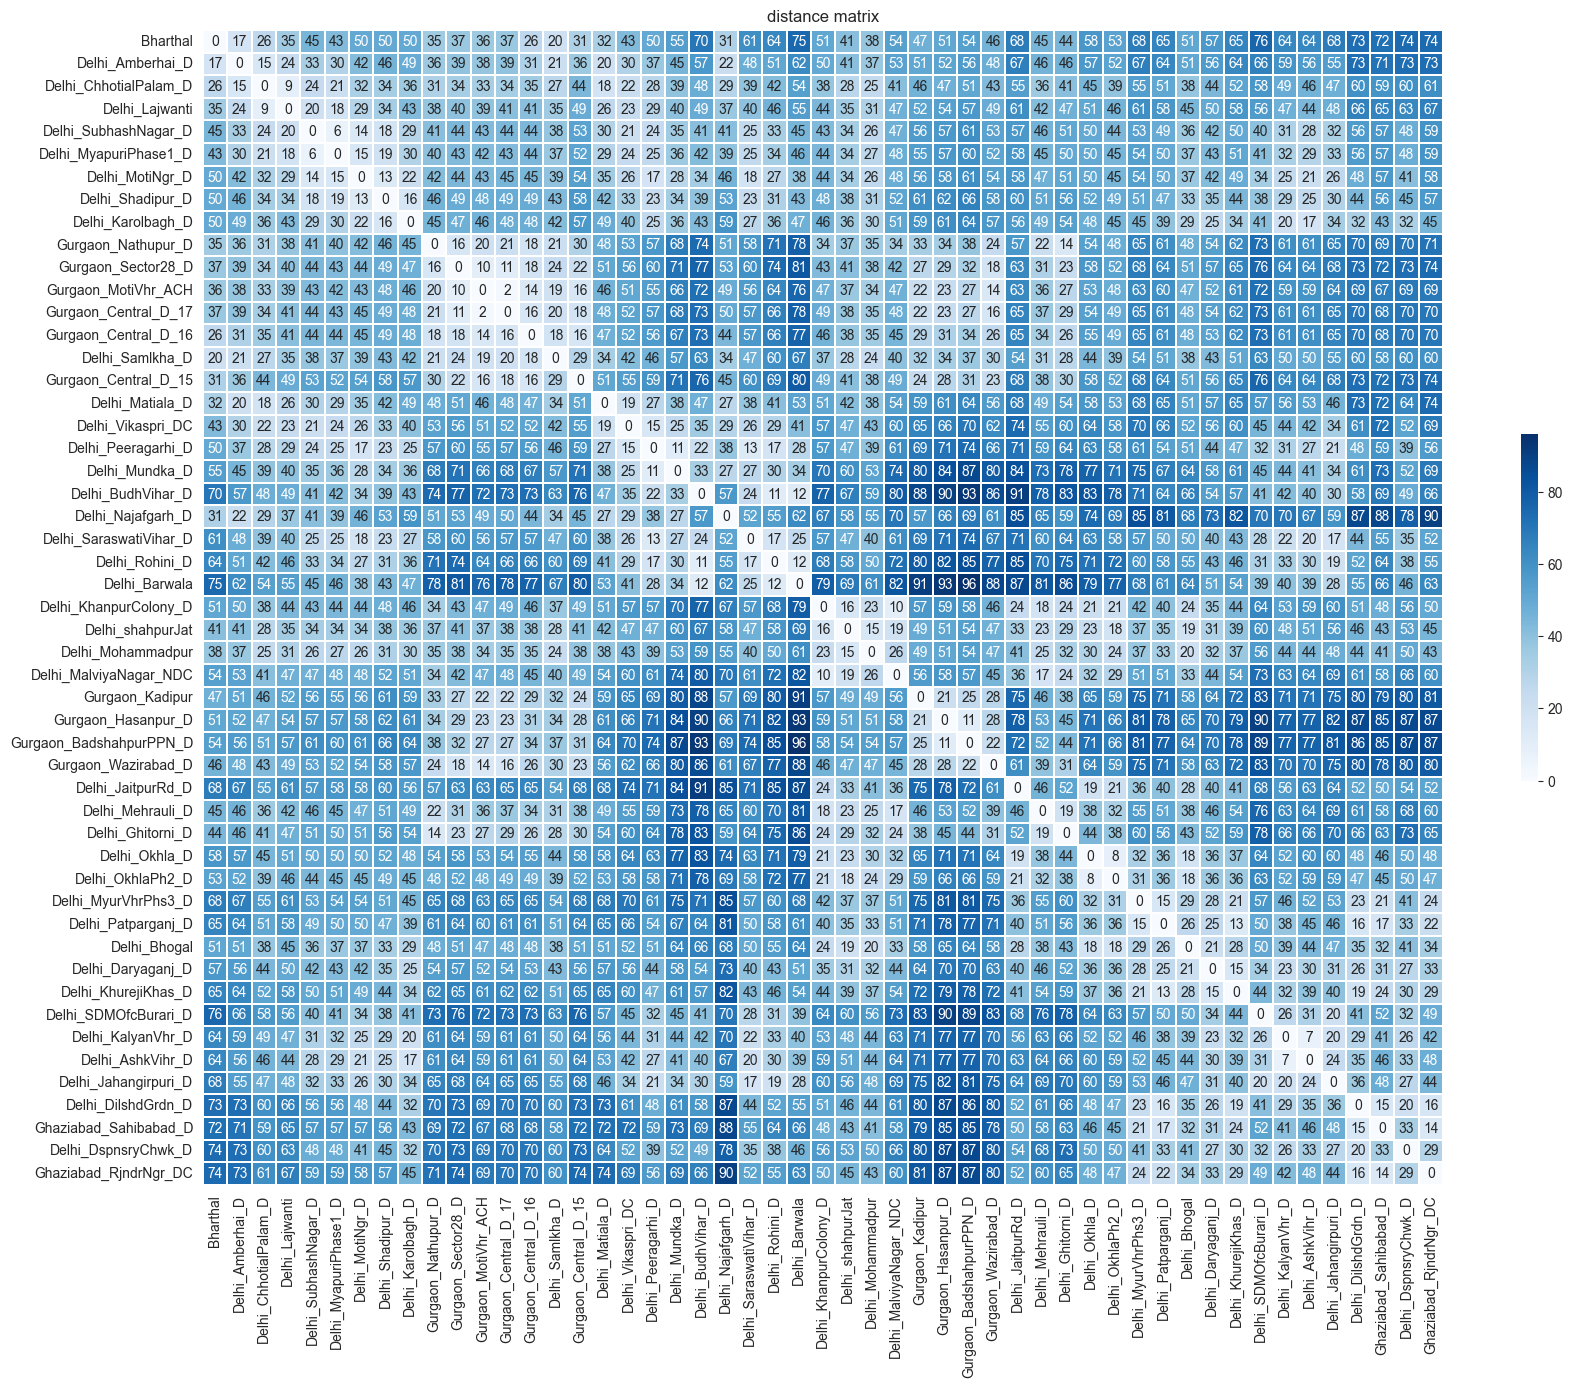

In [52]:
tat_df.set_index('Unnamed: 0',inplace=True)
tat_df.index.name=None
def time_convert_min(s: str):
    s = s.split()
    if len(s)==2:
        a=int(s[0])
        return a
    elif len(s)==4:
        a=int(s[0])
        b=int(s[2])
        time = (a*60)+b
        return time
    else:
        return s[0]
for col in tat_df.columns:
    tat_df[col]= tat_df[col].map(lambda x: time_convert_min(x) if type(x)==str else 0 )
tat_df=tat_df.apply(pd.to_numeric) # convert all columns of DataFrame

np.fill_diagonal(tat_df.values,0)
tat_df.values

X1= tat_df.values
X1 = X1 + X1.T - np.diag(np.diag(X1))
tat_MFC_1= pd.DataFrame(X1,columns=tat_df.columns).set_index(tat_df.columns)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(tat_MFC_1, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.title('distance matrix in km ')
plt.show()

In [53]:
demand_df=pd.read_csv('demand_file_d1.csv')

In [54]:
tat_df = pd.read_csv('tat_matrix.csv')
tat_df=tat_df.set_index('Unnamed: 0')
tat_df.index.name=None

In [55]:
DC

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0,9
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0,9
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0,9
3,Delhi_SubhashNagar_D,28.634047,77.119240,110027,"(28.634047, 77.11924)",0.0,4
4,Delhi_MyapuriPhase1_D,28.631940,77.128330,110064,"(28.63194, 77.12833)",0.0,4
5,Delhi_MotiNgr_D,28.662071,77.131874,110015,"(28.662071, 77.131874)",0.0,4
6,Delhi_Shadipur_D,28.653624,77.154205,110008,"(28.653624, 77.154205)",0.0,4
7,Delhi_Karolbagh_D,28.654518,77.187500,110005,"(28.654518, 77.1875)",0.0,2
8,Delhi_Samlkha_D,28.535456,77.088715,110037,"(28.535456, 77.088715)",1.0,7
9,Gurgaon_Central_D_16,28.498924,77.063225,122015,"(28.498924, 77.063225)",1.0,7


In [56]:
DC=DC.merge(demand_df,how='outer')

In [57]:
DC

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0,9,NaN
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0,9,NaN
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0,9,NaN
3,Delhi_SubhashNagar_D,28.634047,77.119240,110027,"(28.634047, 77.11924)",0.0,4,NaN
4,Delhi_MyapuriPhase1_D,28.631940,77.128330,110064,"(28.63194, 77.12833)",0.0,4,NaN
5,Delhi_MotiNgr_D,28.662071,77.131874,110015,"(28.662071, 77.131874)",0.0,4,43.0
6,Delhi_Shadipur_D,28.653624,77.154205,110008,"(28.653624, 77.154205)",0.0,4,NaN
7,Delhi_Karolbagh_D,28.654518,77.187500,110005,"(28.654518, 77.1875)",0.0,2,NaN
8,Delhi_Samlkha_D,28.535456,77.088715,110037,"(28.535456, 77.088715)",1.0,7,36.0
9,Gurgaon_Central_D_16,28.498924,77.063225,122015,"(28.498924, 77.063225)",1.0,7,22.0


In [58]:
import re

In [59]:
## Create list of cluster for LP
numbers='6,4,7'
clusters = [int(i) for i in re.split("[^0-9]", numbers) if i != ""]

In [60]:
clusters

[6, 4, 7]

In [61]:
study = DC[DC['org_cluster'].isin([np.nan]+clusters)]['center_name']

In [62]:
print(study)

24         Delhi_Mohammadpur
25          Delhi_shahpurJat
26    Delhi_MalviyaNagar_NDC
27     Delhi_KhanpurColony_D
32          Delhi_Mehrauli_D
33          Delhi_Ghitorni_D
34             Delhi_Okhla_D
35          Delhi_OkhlaPh2_D
36         Delhi_JaitpurRd_D
37              Delhi_Bhogal
38         Delhi_Daryaganj_D
39       Delhi_KhurejiKhas_D
40        Delhi_Patparganj_D
41       Delhi_MyurVhrPhs3_D
50                  Bharthal
Name: center_name, dtype: object


In [63]:
selection=list(DC[DC['center_name'].isin(study)&(DC['demand'].notna())]['center_name'])
tat=tat_df.loc[selection,selection]

In [64]:
tat

,Delhi_Mohammadpur,Delhi_shahpurJat,Delhi_Mehrauli_D,Delhi_OkhlaPh2_D,Delhi_Daryaganj_D,Delhi_KhurejiKhas_D,Delhi_Patparganj_D,Delhi_MyurVhrPhs3_D,Bharthal
Delhi_Mohammadpur,0,15,25,24,32,37,33,37,38
Delhi_shahpurJat,15,0,23,18,31,39,35,37,41
Delhi_Mehrauli_D,25,23,0,32,46,54,51,55,45
Delhi_OkhlaPh2_D,24,18,32,0,36,36,36,31,53
Delhi_Daryaganj_D,32,31,46,36,0,15,25,28,57
Delhi_KhurejiKhas_D,37,39,54,36,15,0,13,21,65
Delhi_Patparganj_D,33,35,51,36,25,13,0,15,65
Delhi_MyurVhrPhs3_D,37,37,55,31,28,21,15,0,68
Bharthal,38,41,45,53,57,65,65,68,0


In [65]:
vehicle_capacity=75

In [66]:
demands = DC[DC['center_name'].isin(study)&(DC['demand'].notna())]['demand'].values

In [67]:
DC

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,Delhi_Amberhai_D,28.577110,77.050360,110075,"(28.57711, 77.05036)",0.0,9,NaN
1,Delhi_ChhotialPalam_D,28.590162,77.075810,110045,"(28.590162, 77.07581)",0.0,9,NaN
2,Delhi_Lajwanti,28.604965,77.106384,110046,"(28.604965, 77.106384)",0.0,9,NaN
3,Delhi_SubhashNagar_D,28.634047,77.119240,110027,"(28.634047, 77.11924)",0.0,4,NaN
4,Delhi_MyapuriPhase1_D,28.631940,77.128330,110064,"(28.63194, 77.12833)",0.0,4,NaN
5,Delhi_MotiNgr_D,28.662071,77.131874,110015,"(28.662071, 77.131874)",0.0,4,43.0
6,Delhi_Shadipur_D,28.653624,77.154205,110008,"(28.653624, 77.154205)",0.0,4,NaN
7,Delhi_Karolbagh_D,28.654518,77.187500,110005,"(28.654518, 77.1875)",0.0,2,NaN
8,Delhi_Samlkha_D,28.535456,77.088715,110037,"(28.535456, 77.088715)",1.0,7,36.0
9,Gurgaon_Central_D_16,28.498924,77.063225,122015,"(28.498924, 77.063225)",1.0,7,22.0


In [68]:
print(demands)

[24. 21. 26. 40. 44. 26. 36. 46.  0.]


In [69]:
list(study)

['Delhi_Mohammadpur',
 'Delhi_shahpurJat',
 'Delhi_MalviyaNagar_NDC',
 'Delhi_KhanpurColony_D',
 'Delhi_Mehrauli_D',
 'Delhi_Ghitorni_D',
 'Delhi_Okhla_D',
 'Delhi_OkhlaPh2_D',
 'Delhi_JaitpurRd_D',
 'Delhi_Bhogal',
 'Delhi_Daryaganj_D',
 'Delhi_KhurejiKhas_D',
 'Delhi_Patparganj_D',
 'Delhi_MyurVhrPhs3_D',
 'Bharthal']

In [76]:
n_customer = len(tat)-1
n_point = n_customer + 1
import pulp
import itertools
problem = pulp.LpProblem('cvrp_mip', pulp.LpMinimize)

# set variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
n_vehicle = pulp.LpVariable('n_vehicle', lowBound=0, upBound=100, cat='Integer')

# set objective function
problem += pulp.lpSum([tat.iloc[:,:].values[i][j]  * x[i, j] for i in range(n_point) for j in range(n_point)])

# set constrains
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(1, n_point):
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1

problem += pulp.lpSum(x[i, 0] for i in range(n_point)) == n_vehicle
problem += pulp.lpSum(x[0, i] for i in range(n_point)) == n_vehicle

# eliminate subtour
subtours = []
for length in range(2, n_point):
     subtours += itertools.combinations(range(1, n_point), length)

for subt in subtours:
    demand = np.sum([demands[s] for s in subt])
    arcs = [x[i, j] for i, j in itertools.permutations(subt, 2)]
    problem += pulp.lpSum(arcs) <= np.max([0, len(subt) - np.ceil(demand / vehicle_capacity)])
## time constraint
## solve proble
status = problem.solve()
# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective),pulp.value(n_vehicle)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/slackroo/Data_science/UNIV_ai/venv/lib/python3.8/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/16939e9c63cb45bf84a29ab7ed078b71-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/6d/ydlrjs7x3_n6lhh19hn27v200000gn/T/16939e9c63cb45bf84a29ab7ed078b71-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 279 COLUMNS
At line 4273 RHS
At line 4548 BOUNDS
At line 4631 ENDATA
Problem MODEL has 274 rows, 82 columns and 3757 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 369.5 - 0.00 seconds
Cgl0002I 21 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 62 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 62 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 53 strengthened rows, 0

(1, 'Optimal', 373.0, 4.0)

In [73]:
study= DC[DC['center_name'].isin(selection)]

In [81]:
vrp_routes

[[(0, 1), (1, 3), (3, 0)],
 [(0, 2), (2, 8), (8, 4), (4, 0)],
 [(0, 5), (5, 6), (6, 0)],
 [(0, 7), (7, 0)]]

4.0


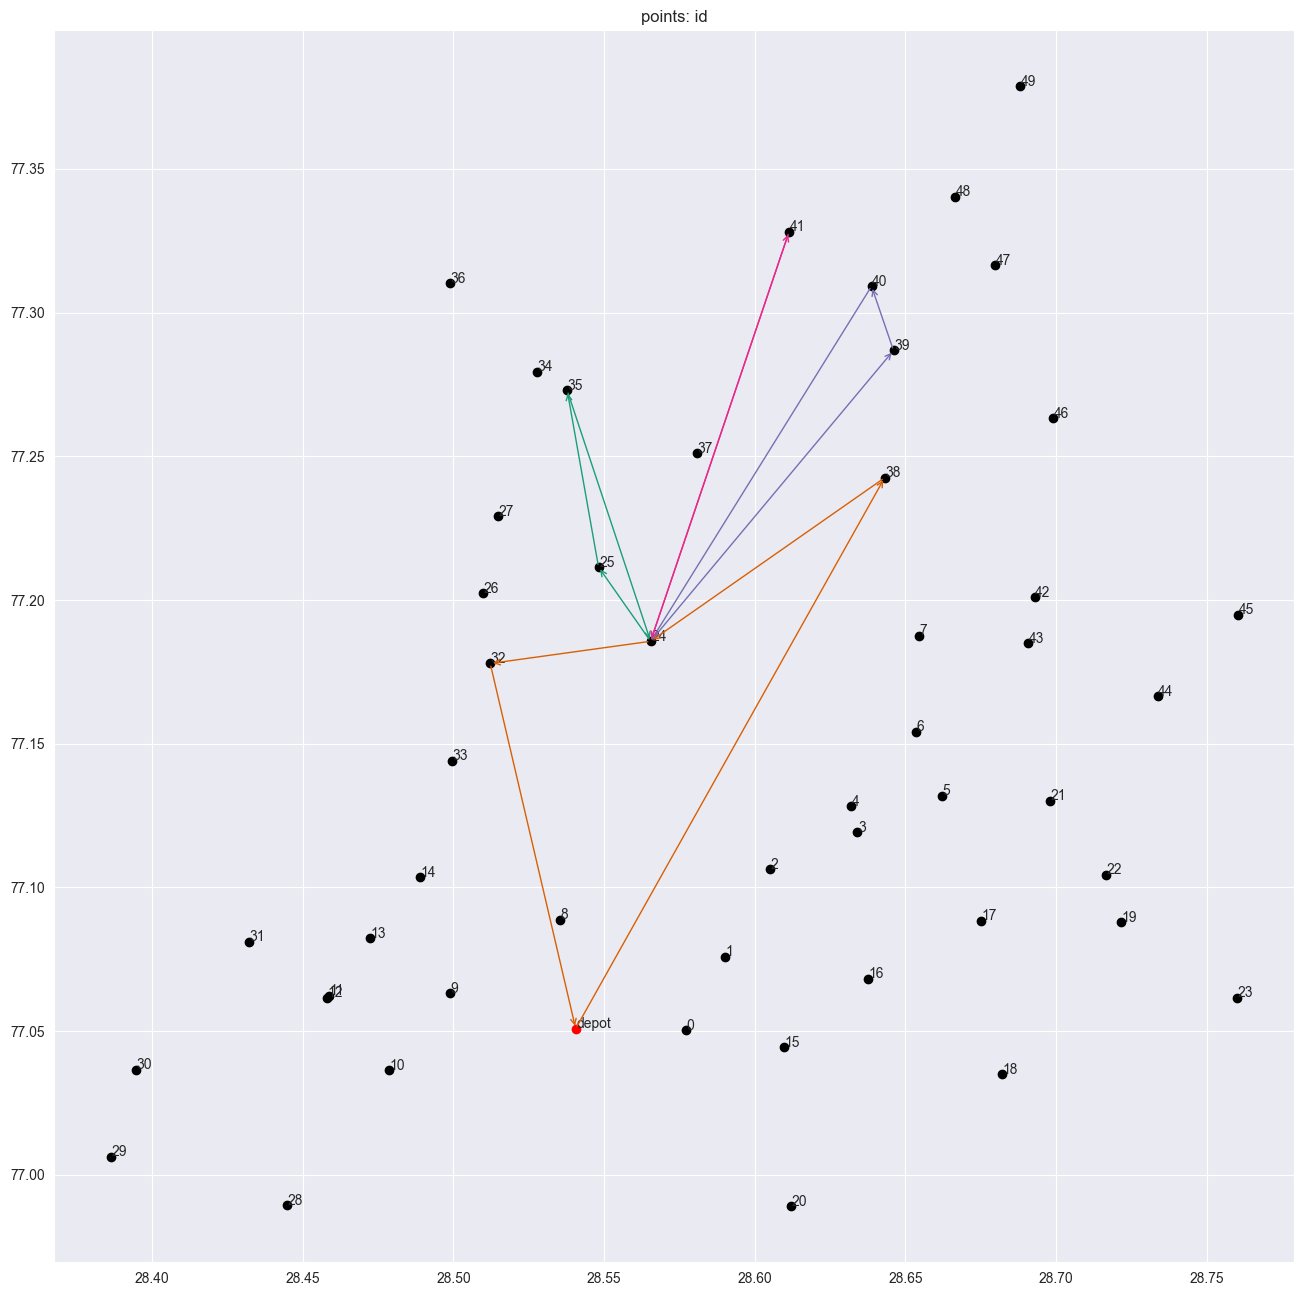

In [78]:
fig= plt.figure(figsize=(16, 16))

for i, row in DC.iterrows():
    if row['center_name']=='Bharthal':
        plt.scatter(row['Lattitude'], row['Longitude'], c='r')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, 'depot')
    else:# row['org_cluster']==4:
        plt.scatter(row['Lattitude'], row['Longitude'], c='black')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, f'{i}')
        
#plt.xlim([study['Lattitude'].min()-0.1,study['Lattitude'].max()+0.1])
#plt.ylim([study['Longitude'].min()-0.1,study['Longitude'].max()+0.1])
plt.title('points: id')

# draw optimal route
cmap = plt.cm.get_cmap('Dark2')
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
print(pulp.value(n_vehicle))
vrp_routes=[]
for v in range(int(pulp.value(n_vehicle))):   
    # identify the route of each vehicle
    vehicle_route = [routes[v]]
    while vehicle_route[-1][1] != 0:
        for p in routes:
            if p[0] == vehicle_route[-1][1]:
                vehicle_route.append(p)
                break
    #for
    vrp_routes.append(vehicle_route)

    # draw for each vehicle
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor=cmap(v))
    for i, j in vehicle_route:
        plt.annotate('', xy=[study.iloc[j]['Lattitude'], study.iloc[j]['Longitude']], xytext=[study.iloc[i]['Lattitude'], study.iloc[i]['Longitude']], arrowprops=arrowprops)
                
plt.show()

In [80]:
import folium

# Create a Folium map
m_3 = folium.Map(location=[28.17, 76.86], tiles="OpenStreetMap", zoom_start=10)

# Define the radius for the Circle marker
radius = 2000

for idx, row in DC.iterrows():
    if row['center_name'] == 'Bharthal':
        # Add a Circle marker for 'Bharthal'
        folium.Circle(
            radius=radius,
            location=[row['Lattitude'], row['Longitude']],
            fill=False,
            color='red'
        ).add_to(m_3)

        # Add a Marker for 'Bharthal' with a green icon
        folium.Marker(
            [row['Lattitude'], row['Longitude']],
            icon=folium.Icon(color='green'),
            popup=row['center_name']
        ).add_to(m_3)
    else:
        colors = ['red', 'blue', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkgreen']
        for i in range(0, 8):
            if row['org_cluster'] == i:
                # Add Markers with different colors based on 'org_cluster'
                folium.Marker(
                    [row['Lattitude'], row['Longitude']],
                    icon=folium.Icon(color=colors[i]),
                    popup=row['center_name']
                ).add_to(m_3)

# Assuming 'x' is a list of coordinates for a PolyLine
folium.PolyLine(
    locations=x,
    color="blue",  # Change the color as needed
    weight=3,       # Adjust the weight (thickness) of the line
).add_to(m_3)

# Display the Folium map
m_3


In [ ]:
selection=list(DC[DC['center_name'].isin(study)

In [221]:
study= DC[DC['center_name'].isin(selection)]

,index,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1
0,20,Delhi_Najafgarh_D,28.612057,76.989060,110043,"(28.612057, 76.98906)",3.0,9
1,21,Delhi_SaraswatiVihar_D,28.697979,77.130220,110034,"(28.697979, 77.13022)",3.0,4
2,22,Delhi_Rohini_D,28.716604,77.104410,110085,"(28.716604, 77.10441)",3.0,8
3,23,Delhi_Barwala,28.759870,77.061650,110039,"(28.75987, 77.06165)",3.0,8
4,28,Gurgaon_Kadipur,28.444597,76.989400,122001,"(28.444597, 76.9894)",5.0,3
5,29,Gurgaon_Hasanpur_D,28.386251,77.006250,122001,"(28.386251, 77.00625)",5.0,3
6,30,Gurgaon_BadshahpurPPN_D,28.394556,77.036530,122002,"(28.394556, 77.03653)",5.0,3
7,31,Gurgaon_Wazirabad_D,28.432222,77.081085,122003,"(28.432222, 77.081085)",5.0,3
8,32,Delhi_Mehrauli_D,28.512200,77.177900,110030,"(28.5122, 77.1779)",6.0,6
9,33,Delhi_Ghitorni_D,28.499458,77.144070,110030,"(28.499458, 77.14407)",6.0,6


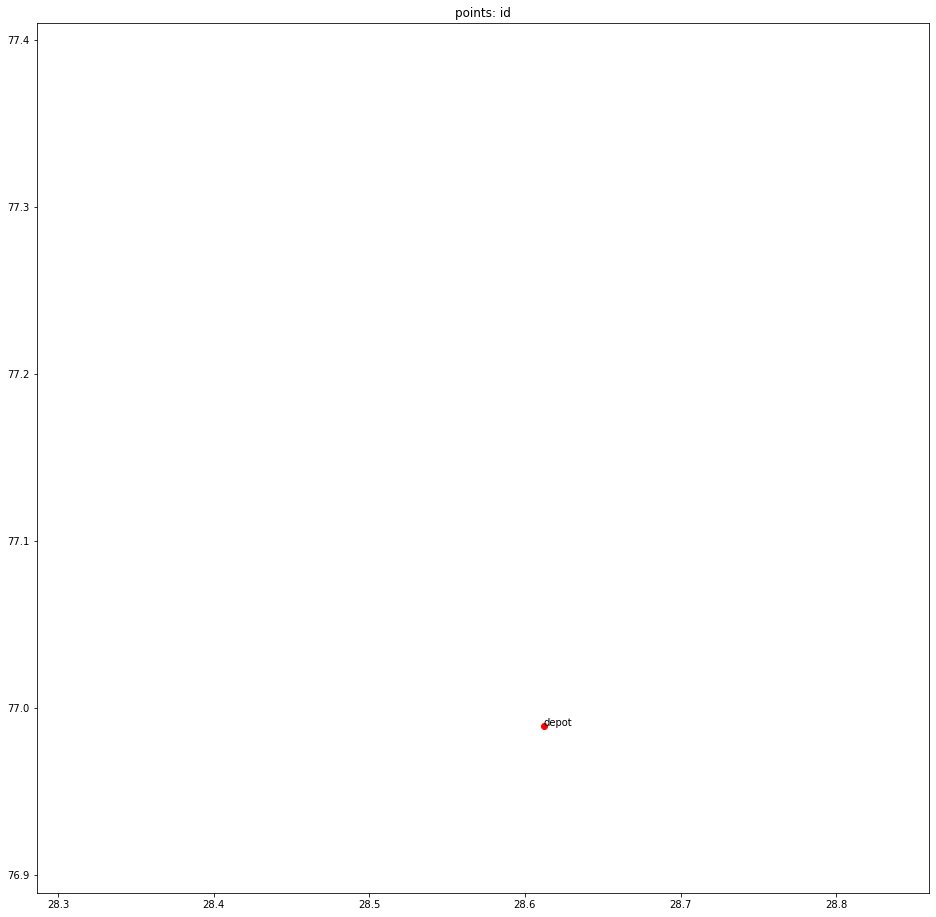

In [225]:
# check TSP problem and optimized route

# draw problem state
plt.figure(figsize=(16, 16))

for i, row in study.iterrows():
    if i==0:
        plt.scatter(row['Lattitude'], row['Longitude'], c='r')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, 'depot')
    elif row['org_cluster']==4:
        plt.scatter(row['Lattitude'], row['Longitude'], c='black')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, f'{i}')
        
plt.xlim([study['Lattitude'].min()-0.1,study['Lattitude'].max()+0.1])
plt.ylim([study['Longitude'].min()-0.1,study['Longitude'].max()+0.1])
plt.title('points: id')
plt.show()

# draw optimal route
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[study.iloc[j]['Lattitude'], study.iloc[j]['Longitude']], xytext=[study.iloc[i]['Lattitude'], study.iloc[i]['Longitude']], arrowprops=arrowprops)
                
plt.show()

In [223]:
routes

[(0, 5),
 (1, 14),
 (2, 3),
 (3, 4),
 (4, 1),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 10),
 (9, 12),
 (10, 9),
 (11, 13),
 (12, 11),
 (13, 2),
 (14, 0)]

In [134]:
study['numbering']=range(len(study))

In [127]:
study=study.reset

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1
20,Delhi_Najafgarh_D,28.612057,76.989060,110043,"(28.612057, 76.98906)",3.0,9
21,Delhi_SaraswatiVihar_D,28.697979,77.130220,110034,"(28.697979, 77.13022)",3.0,4
22,Delhi_Rohini_D,28.716604,77.104410,110085,"(28.716604, 77.10441)",3.0,8
23,Delhi_Barwala,28.759870,77.061650,110039,"(28.75987, 77.06165)",3.0,8
28,Gurgaon_Kadipur,28.444597,76.989400,122001,"(28.444597, 76.9894)",5.0,3
29,Gurgaon_Hasanpur_D,28.386251,77.006250,122001,"(28.386251, 77.00625)",5.0,3
30,Gurgaon_BadshahpurPPN_D,28.394556,77.036530,122002,"(28.394556, 77.03653)",5.0,3
31,Gurgaon_Wazirabad_D,28.432222,77.081085,122003,"(28.432222, 77.081085)",5.0,3
32,Delhi_Mehrauli_D,28.512200,77.177900,110030,"(28.5122, 77.1779)",6.0,6
33,Delhi_Ghitorni_D,28.499458,77.144070,110030,"(28.499458, 77.14407)",6.0,6


In [135]:
re_rout_dict = study['numbering'].to_dict()
re_rout_dict= {v:k for k, v in re_rout_dict.items()}

In [136]:
routes = list(zip(*[iter([re_rout_dict[i]  for j in routes for i in j])]*2))

KeyError: 14

In [137]:
re_rout_dict

{0: 20,
 1: 21,
 2: 22,
 3: 23,
 4: 28,
 5: 29,
 6: 30,
 7: 31,
 8: 32,
 9: 33,
 10: 34,
 11: 35,
 12: 36,
 13: 50}

In [132]:
routes

[(0, 5),
 (1, 14),
 (2, 3),
 (3, 4),
 (4, 1),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 10),
 (9, 12),
 (10, 9),
 (11, 13),
 (12, 11),
 (13, 2),
 (14, 0)]

In [134]:
cl_ls=[]
for i, j in routes:
    cl_ls.append(f'{DC.iloc[i]["center_name"]}-{DC.iloc[j]["center_name"]}')

In [135]:
clust1=pd.DataFrame(cl_ls,columns=['route'])

In [136]:
clust1['oc']=clust1['route'].apply(lambda x: x.split('-')[0])
clust1['ntc']=clust1['route'].apply(lambda x: x.split('-')[1])

In [137]:
clust1['order_number']=np.nan

In [138]:
def order_function(df,source,dest,n=1):
    if df['order_number'].notna().sum()==len(df):
        return df['order_number']
    else:
        if df['order_number'].isna().sum()==len(df) and dest in df['ntc'].unique():
            df.loc[df['ntc']==dest,['order_number']]=len(df)
            return order_function(df,source,dest,n)
        dfz=df[(df['order_number'].isna())&(df['oc']==source)]
        df.loc[(df['order_number'].isna())&(df['oc']==source),['order_number']]=n
        source=dfz['ntc'].values[0]
        n+=1
        return order_function(df,source,dest,n)

In [139]:
order_function(clust1,'Bharthal','Bharthal')

0    4.0
1    5.0
2    3.0
3    2.0
4    1.0
Name: order_number, dtype: float64

In [140]:
clust1['route_name']=clust1['oc'][0]+'-'+"-".join(clust1.sort_values('order_number')['ntc'].values)

In [141]:
clust1.sort_values('order_number')


,route,oc,ntc,order_number,route_name
4,Bharthal-Delhi_Barwala,Bharthal,Delhi_Barwala,1.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
3,Delhi_Barwala-Delhi_Rohini_D,Delhi_Barwala,Delhi_Rohini_D,2.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
2,Delhi_Rohini_D-Delhi_Najafgarh_D,Delhi_Rohini_D,Delhi_Najafgarh_D,3.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
0,Delhi_Najafgarh_D-Delhi_SaraswatiVihar_D,Delhi_Najafgarh_D,Delhi_SaraswatiVihar_D,4.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
1,Delhi_SaraswatiVihar_D-Bharthal,Delhi_SaraswatiVihar_D,Bharthal,5.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...


In [142]:
clust1['oc'][0]+'-'+"-".join(clust1.sort_values('order_number')['ntc'].values)

'Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D-Delhi_Najafgarh_D-Delhi_SaraswatiVihar_D-Bharthal'

## VRP

Text(0.5, 1.0, 'points: id')

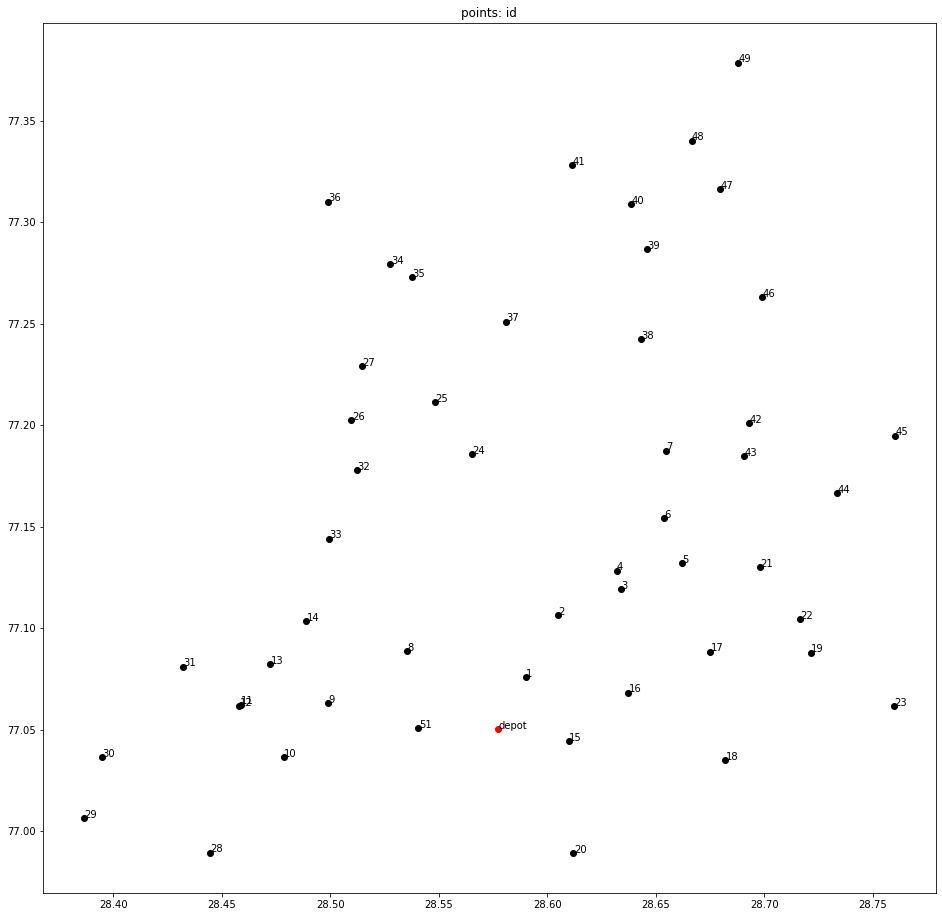

In [45]:
# draw problem state
plt.figure(figsize=(16, 16))

for i, row in DC.iterrows():
    if i==0:
        plt.scatter(row['Lattitude'], row['Longitude'], c='r')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, 'depot')
    else:# row['org_cluster']==4:
        plt.scatter(row['Lattitude'], row['Longitude'], c='black')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, f'{i}')
        
#plt.xlim([study['Lattitude'].min()-0.1,study['Lattitude'].max()+0.1])
#plt.ylim([study['Longitude'].min()-0.1,study['Longitude'].max()+0.1])
plt.title('points: id')
# plt.show()

In [424]:
import random

In [425]:
demand  = [random.randint(20,50) for i in range(51)]

In [426]:
dum_ind=[random.randint(1,52) for i in range(30)]
for i in range(len(demand)):
    if i in dum_ind:
        demand[i]=0

In [427]:
demand[0]=0

In [428]:
demand[17]=np.nan

In [429]:

DC['demand']=demand[:50]

In [430]:
demand_file= DC.iloc[:,[0,-1]]

In [431]:
demand_file[demand_file['demand']!=0]#.to_csv('demand_file_d1.csv')

,center_name,demand
1,Delhi_Amberhai_D,41.0
2,Delhi_ChhotialPalam_D,24.0
3,Delhi_Lajwanti,39.0
4,Delhi_SubhashNagar_D,27.0
5,Delhi_MyapuriPhase1_D,29.0
7,Delhi_Shadipur_D,44.0
10,Gurgaon_Central_D_16,31.0
11,Gurgaon_Central_D_15,23.0
12,Gurgaon_MotiVhr_ACH,29.0
13,Gurgaon_Central_D_17,27.0


In [432]:
study = DC[DC['org_cluster'].isin([2,6,np.nan])]['center_name']

In [433]:
study

0               Bharthal
16       Delhi_Matiala_D
17     Delhi_Vikaspri_DC
18    Delhi_Peeragarhi_D
19        Delhi_Mundka_D
20     Delhi_BudhVihar_D
32      Delhi_Mehrauli_D
33      Delhi_Ghitorni_D
34         Delhi_Okhla_D
35      Delhi_OkhlaPh2_D
36     Delhi_JaitpurRd_D
Name: center_name, dtype: object

In [440]:
 DC[(DC['center_name'].isin(study))&(DC['demand'].notna())]

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,Bharthal,28.540562,77.05089,110077,"(28.540562, 77.05089)",NaN,7,0.0
16,Delhi_Matiala_D,28.609793,77.04435,110059,"(28.609793, 77.04435)",2.0,9,25.0
18,Delhi_Peeragarhi_D,28.675060,77.08843,110087,"(28.67506, 77.08843)",2.0,8,0.0
19,Delhi_Mundka_D,28.681965,77.03503,110041,"(28.681965, 77.03503)",2.0,8,0.0
20,Delhi_BudhVihar_D,28.721437,77.08794,110086,"(28.721437, 77.08794)",2.0,8,22.0
32,Delhi_Mehrauli_D,28.512200,77.17790,110030,"(28.5122, 77.1779)",6.0,6,38.0
33,Delhi_Ghitorni_D,28.499458,77.14407,110030,"(28.499458, 77.14407)",6.0,6,0.0
34,Delhi_Okhla_D,28.527700,77.27940,110020,"(28.5277, 77.2794)",6.0,5,24.0
35,Delhi_OkhlaPh2_D,28.537743,77.27288,110020,"(28.537743, 77.27288)",6.0,5,30.0
36,Delhi_JaitpurRd_D,28.498747,77.31020,110044,"(28.498747, 77.3102)",6.0,5,0.0


In [441]:
tat= tat_MFC_1.loc[study,study]

In [442]:
DC[DC['center_name'].isin(study)]#['demand'].values

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,Bharthal,28.540562,77.05089,110077,"(28.540562, 77.05089)",NaN,7,0.0
16,Delhi_Matiala_D,28.609793,77.04435,110059,"(28.609793, 77.04435)",2.0,9,25.0
17,Delhi_Vikaspri_DC,28.637410,77.06824,110018,"(28.63741, 77.06824)",2.0,9,NaN
18,Delhi_Peeragarhi_D,28.675060,77.08843,110087,"(28.67506, 77.08843)",2.0,8,0.0
19,Delhi_Mundka_D,28.681965,77.03503,110041,"(28.681965, 77.03503)",2.0,8,0.0
20,Delhi_BudhVihar_D,28.721437,77.08794,110086,"(28.721437, 77.08794)",2.0,8,22.0
32,Delhi_Mehrauli_D,28.512200,77.17790,110030,"(28.5122, 77.1779)",6.0,6,38.0
33,Delhi_Ghitorni_D,28.499458,77.14407,110030,"(28.499458, 77.14407)",6.0,6,0.0
34,Delhi_Okhla_D,28.527700,77.27940,110020,"(28.5277, 77.2794)",6.0,5,24.0
35,Delhi_OkhlaPh2_D,28.537743,77.27288,110020,"(28.537743, 77.27288)",6.0,5,30.0


In [461]:
n_customer = len(tat)-1
n_point = n_customer + 1
vehicle_capacity = 75

In [444]:
import itertools

In [445]:
 DC[(DC['center_name'].isin(study))&(DC['demand']!=0)]['demand']

16    25.0
17     NaN
20    22.0
32    38.0
34    24.0
35    30.0
Name: demand, dtype: float64

In [452]:
selection=list(DC[DC['center_name'].isin(study)&(DC['demand'].notna())]['center_name'])

In [457]:
tat=tat.loc[selection,selection]

In [462]:
%%time

demands = DC[DC['center_name'].isin(study)&(DC['demand'].notna())]['demand'].values

# set problem
problem = pulp.LpProblem('cvrp_mip', pulp.LpMinimize)
print(len(tat),len(demands))
# set variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
n_vehicle = pulp.LpVariable('n_vehicle', lowBound=0, upBound=100, cat='Integer')

# set objective function
problem += pulp.lpSum([tat.iloc[:,:].values[i][j]  * x[i, j] for i in range(n_point) for j in range(n_point)])

# set constrains
for i in range(n_point):
    problem += x[i, i] == 0
    
for i in range(1, n_point):
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
        
problem += pulp.lpSum(x[i, 0] for i in range(n_point)) == n_vehicle
problem += pulp.lpSum(x[0, i] for i in range(n_point)) == n_vehicle

# eliminate subtour
subtours = []
for length in range(2, n_point):
     subtours += itertools.combinations(range(1, n_point), length)

for st in subtours:
    demand = np.sum([demands[s] for s in st])
    arcs = [x[i, j] for i, j in itertools.permutations(st, 2)]
    problem += pulp.lpSum(arcs) <= np.max([0, len(st) - np.ceil(demand / vehicle_capacity)])

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

10 10
CPU times: total: 188 ms
Wall time: 612 ms


(1, 'Optimal', 417.0)

In [496]:
print(problem)

cvrp_mip:
MINIMIZE
32*x_(0,_1) + 50*x_(0,_2) + 55*x_(0,_3) + 70*x_(0,_4) + 45*x_(0,_5) + 44*x_(0,_6) + 58*x_(0,_7) + 53*x_(0,_8) + 68*x_(0,_9) + 32*x_(1,_0) + 27*x_(1,_2) + 38*x_(1,_3) + 47*x_(1,_4) + 49*x_(1,_5) + 54*x_(1,_6) + 58*x_(1,_7) + 53*x_(1,_8) + 68*x_(1,_9) + 50*x_(2,_0) + 27*x_(2,_1) + 11*x_(2,_3) + 22*x_(2,_4) + 59*x_(2,_5) + 64*x_(2,_6) + 63*x_(2,_7) + 58*x_(2,_8) + 71*x_(2,_9) + 55*x_(3,_0) + 38*x_(3,_1) + 11*x_(3,_2) + 33*x_(3,_4) + 73*x_(3,_5) + 78*x_(3,_6) + 77*x_(3,_7) + 71*x_(3,_8) + 84*x_(3,_9) + 70*x_(4,_0) + 47*x_(4,_1) + 22*x_(4,_2) + 33*x_(4,_3) + 78*x_(4,_5) + 83*x_(4,_6) + 83*x_(4,_7) + 78*x_(4,_8) + 91*x_(4,_9) + 45*x_(5,_0) + 49*x_(5,_1) + 59*x_(5,_2) + 73*x_(5,_3) + 78*x_(5,_4) + 19*x_(5,_6) + 38*x_(5,_7) + 32*x_(5,_8) + 46*x_(5,_9) + 44*x_(6,_0) + 54*x_(6,_1) + 64*x_(6,_2) + 78*x_(6,_3) + 83*x_(6,_4) + 19*x_(6,_5) + 44*x_(6,_7) + 38*x_(6,_8) + 52*x_(6,_9) + 58*x_(7,_0) + 58*x_(7,_1) + 63*x_(7,_2) + 77*x_(7,_3) + 83*x_(7,_4) + 38*x_(7,_5) + 44*x_(7,_6) + 8

In [378]:
(pulp.value(problem.objective)/60)/pulp.value(n_vehicle)

2.025

In [379]:
pulp.value(n_vehicle)

4.0

In [463]:
routes

[(0, 1),
 (0, 4),
 (0, 6),
 (0, 10),
 (1, 0),
 (2, 0),
 (3, 5),
 (4, 3),
 (5, 2),
 (6, 7),
 (7, 0),
 (8, 9),
 (9, 0),
 (10, 8)]

In [465]:
import matplotlib
import matplotlib.pylab as plt

In [466]:
study= DC[DC['center_name'].isin(study)]

2.0


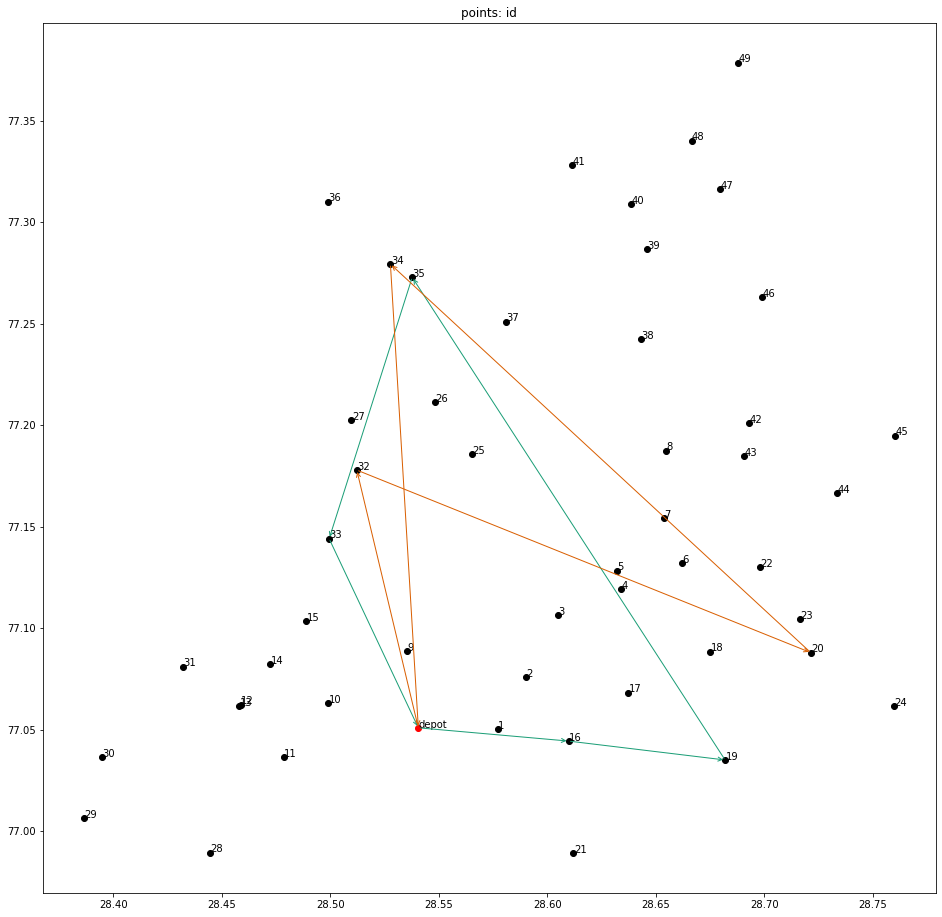

In [495]:
# check TSP problem and optimized route

plt.figure(figsize=(16, 16))

for i, row in DC.iterrows():
    if i==0:
        plt.scatter(row['Lattitude'], row['Longitude'], c='r')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, 'depot')
    else:# row['org_cluster']==4:
        plt.scatter(row['Lattitude'], row['Longitude'], c='black')
        plt.text(row['Lattitude'] +0.0002, row['Longitude'] +0.0002, f'{i}')
        
#plt.xlim([study['Lattitude'].min()-0.1,study['Lattitude'].max()+0.1])
#plt.ylim([study['Longitude'].min()-0.1,study['Longitude'].max()+0.1])
plt.title('points: id')

# draw optimal route
cmap = matplotlib.cm.get_cmap('Dark2')
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
print(pulp.value(n_vehicle))
vrp_routes=[]
for v in range(int(pulp.value(n_vehicle))):
    
    
    # identify the route of each vehicle
    vehicle_route = [routes[v]]
    while vehicle_route[-1][1] != 0:
        for p in routes:
            if p[0] == vehicle_route[-1][1]:
                vehicle_route.append(p)
                break
    #for
    vrp_routes.append(vehicle_route)

    # draw for each vehicle
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor=cmap(v))
    for i, j in vehicle_route:
        plt.annotate('', xy=[study.iloc[j]['Lattitude'], study.iloc[j]['Longitude']], xytext=[study.iloc[i]['Lattitude'], study.iloc[i]['Longitude']], arrowprops=arrowprops)
                
plt.show()

In [474]:
vrp_routes

[[(0, 1), (1, 4), (4, 9), (9, 7), (7, 0)], [(0, 6), (6, 5), (5, 8), (8, 0)]]

In [475]:
study.reset_index()#['']

,index,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,0,Bharthal,28.540562,77.05089,110077,"(28.540562, 77.05089)",NaN,7,0.0
1,16,Delhi_Matiala_D,28.609793,77.04435,110059,"(28.609793, 77.04435)",2.0,9,25.0
2,17,Delhi_Vikaspri_DC,28.637410,77.06824,110018,"(28.63741, 77.06824)",2.0,9,NaN
3,18,Delhi_Peeragarhi_D,28.675060,77.08843,110087,"(28.67506, 77.08843)",2.0,8,0.0
4,19,Delhi_Mundka_D,28.681965,77.03503,110041,"(28.681965, 77.03503)",2.0,8,0.0
5,20,Delhi_BudhVihar_D,28.721437,77.08794,110086,"(28.721437, 77.08794)",2.0,8,22.0
6,32,Delhi_Mehrauli_D,28.512200,77.17790,110030,"(28.5122, 77.1779)",6.0,6,38.0
7,33,Delhi_Ghitorni_D,28.499458,77.14407,110030,"(28.499458, 77.14407)",6.0,6,0.0
8,34,Delhi_Okhla_D,28.527700,77.27940,110020,"(28.5277, 77.2794)",6.0,5,24.0
9,35,Delhi_OkhlaPh2_D,28.537743,77.27288,110020,"(28.537743, 77.27288)",6.0,5,30.0


In [476]:
study

,center_name,Lattitude,Longitude,center_pincode,lat_long,org_cluster,cluster1,demand
0,Bharthal,28.540562,77.05089,110077,"(28.540562, 77.05089)",NaN,7,0.0
16,Delhi_Matiala_D,28.609793,77.04435,110059,"(28.609793, 77.04435)",2.0,9,25.0
17,Delhi_Vikaspri_DC,28.637410,77.06824,110018,"(28.63741, 77.06824)",2.0,9,NaN
18,Delhi_Peeragarhi_D,28.675060,77.08843,110087,"(28.67506, 77.08843)",2.0,8,0.0
19,Delhi_Mundka_D,28.681965,77.03503,110041,"(28.681965, 77.03503)",2.0,8,0.0
20,Delhi_BudhVihar_D,28.721437,77.08794,110086,"(28.721437, 77.08794)",2.0,8,22.0
32,Delhi_Mehrauli_D,28.512200,77.17790,110030,"(28.5122, 77.1779)",6.0,6,38.0
33,Delhi_Ghitorni_D,28.499458,77.14407,110030,"(28.499458, 77.14407)",6.0,6,0.0
34,Delhi_Okhla_D,28.527700,77.27940,110020,"(28.5277, 77.2794)",6.0,5,24.0
35,Delhi_OkhlaPh2_D,28.537743,77.27288,110020,"(28.537743, 77.27288)",6.0,5,30.0


In [477]:
study['numbering']=range(len(study))

C:\Users\s4993sum\AppData\Local\Temp\ipykernel_20960\3153041584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study['numbering']=range(len(study))


In [478]:
re_rout_dict = study['numbering'].to_dict()
re_rout_dict= {v:k for k, v in re_rout_dict.items()}

In [479]:
re_rout_dict

{0: 0, 1: 16, 2: 17, 3: 18, 4: 19, 5: 20, 6: 32, 7: 33, 8: 34, 9: 35, 10: 36}

In [480]:
paths=[]
for routes in vrp_routes:
    paths.append(list(zip(*[iter([re_rout_dict[i]  for j in routes for i in j])]*2)))

In [481]:
paths

[[(0, 16), (16, 19), (19, 35), (35, 33), (33, 0)],
 [(0, 32), (32, 20), (20, 34), (34, 0)]]

In [482]:
cl_ls=[]

for routes in paths:
    r_ls=[]
    for i, j in routes:
        r_ls.append(f'{DC.iloc[i]["center_name"]}-{DC.iloc[j]["center_name"]}')
    cl_ls.append(r_ls)

In [483]:
cl_ls#[0][-1].endswith('Bharthal')

[['Bharthal-Delhi_Matiala_D',
  'Delhi_Matiala_D-Delhi_Mundka_D',
  'Delhi_Mundka_D-Delhi_OkhlaPh2_D',
  'Delhi_OkhlaPh2_D-Delhi_Ghitorni_D',
  'Delhi_Ghitorni_D-Bharthal'],
 ['Bharthal-Delhi_Mehrauli_D',
  'Delhi_Mehrauli_D-Delhi_BudhVihar_D',
  'Delhi_BudhVihar_D-Delhi_Okhla_D',
  'Delhi_Okhla_D-Bharthal']]

In [486]:
new_ls=[]
fullroutes=[]
for i in cl_ls:
    string=''
    for k in range(0,len(i)):
        
        if i[k].startswith('Bharthal'):# or i[k].endswith('Bharthal'):
            string= i[k]
            #print(string)
        else:
            temp=i[k].split('-')
            string=string+'-'+temp[1]
    fullroutes.append(string)

In [487]:
fullroutes

['Bharthal-Delhi_Matiala_D-Delhi_Mundka_D-Delhi_OkhlaPh2_D-Delhi_Ghitorni_D-Bharthal',
 'Bharthal-Delhi_Mehrauli_D-Delhi_BudhVihar_D-Delhi_Okhla_D-Bharthal']

In [488]:
clust1=pd.DataFrame(cl_ls)

In [491]:
clust1.T

,0,1
0,Bharthal-Delhi_Matiala_D,Bharthal-Delhi_Mehrauli_D
1,Delhi_Matiala_D-Delhi_Mundka_D,Delhi_Mehrauli_D-Delhi_BudhVihar_D
2,Delhi_Mundka_D-Delhi_OkhlaPh2_D,Delhi_BudhVihar_D-Delhi_Okhla_D
3,Delhi_OkhlaPh2_D-Delhi_Ghitorni_D,Delhi_Okhla_D-Bharthal
4,Delhi_Ghitorni_D-Bharthal,None


In [493]:
routes_db= pd.DataFrame(fullroutes)

In [494]:
routes_db

,0
0,Bharthal-Delhi_Matiala_D-Delhi_Mundka_D-Delhi_OkhlaPh2_D-Delhi_Ghitorni_D-Bharthal
1,Bharthal-Delhi_Mehrauli_D-Delhi_BudhVihar_D-Delhi_Okhla_D-Bharthal


In [ ]:
clust1['oc']=clust1['route'].apply(lambda x: x.split('-')[0])
clust1['ntc']=clust1['route'].apply(lambda x: x.split('-')[1])

In [100]:
clust1['order_number']=np.nan

In [101]:
def order_function(df,source,dest,n=1):
    if df['order_number'].notna().sum()==len(df):
        return df['order_number']
    else:
        if df['order_number'].isna().sum()==len(df) and dest in df['ntc'].unique():
            df.loc[df['ntc']==dest,['order_number']]=len(df)
            return order_function(df,source,dest,n)
        dfz=df[(df['order_number'].isna())&(df['oc']==source)]
        df.loc[(df['order_number'].isna())&(df['oc']==source),['order_number']]=n
        source=dfz['ntc'].values[0]
        n+=1
        return order_function(df,source,dest,n)

In [105]:
order_function(clust1,'Bharthal','Bharthal')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [103]:
clust1['route_name']=clust1['oc'][0]+'-'+"-".join(clust1.sort_values('order_number')['ntc'].values)

In [141]:
clust1.sort_values('order_number')


,route,oc,ntc,order_number,route_name
4,Bharthal-Delhi_Barwala,Bharthal,Delhi_Barwala,1.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
3,Delhi_Barwala-Delhi_Rohini_D,Delhi_Barwala,Delhi_Rohini_D,2.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
2,Delhi_Rohini_D-Delhi_Najafgarh_D,Delhi_Rohini_D,Delhi_Najafgarh_D,3.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
0,Delhi_Najafgarh_D-Delhi_SaraswatiVihar_D,Delhi_Najafgarh_D,Delhi_SaraswatiVihar_D,4.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...
1,Delhi_SaraswatiVihar_D-Bharthal,Delhi_SaraswatiVihar_D,Bharthal,5.0,Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D...


In [142]:
clust1['oc'][0]+'-'+"-".join(clust1.sort_values('order_number')['ntc'].values)

'Delhi_Najafgarh_D-Delhi_Barwala-Delhi_Rohini_D-Delhi_Najafgarh_D-Delhi_SaraswatiVihar_D-Bharthal'

#### Example Kaggle

In [79]:
# define TSP

n_customer = 9
n_point = n_customer + 1

df = pd.DataFrame({
    'x': np.random.randint(0, 100, n_point),
    'y': np.random.randint(0, 100, n_point),
})

df.iloc[0]['x'] = 0
df.iloc[0]['y'] = 0

df

,x,y
0,0,0
1,21,26
2,68,67
3,87,9
4,17,99
5,93,16
6,12,63
7,60,89
8,69,12
9,15,87


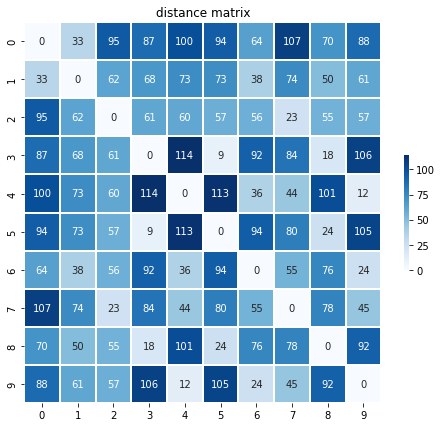

In [80]:
# get distance matrix
from scipy.spatial import distance_matrix
distances = pd.DataFrame(distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values), index=df.index, columns=df.index).values

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.title('distance matrix')
plt.show()

In [83]:
%%time

# set problem
problem = pulp.LpProblem('tsp_mip', pulp.LpMinimize)
# set valiables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# we need to keep track of the order in the tour to eliminate the possibility of subtours
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# set objective function
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# set constrains
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1

# eliminate subtour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1
            
# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

CPU times: total: 31.2 ms
Wall time: 477 ms


(1, 'Optimal', 329.71101821208777)

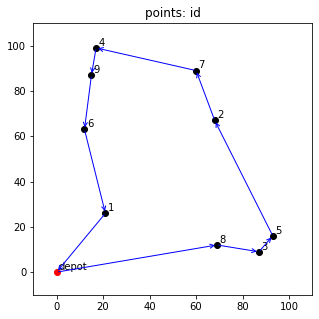

In [84]:
# check TSP problem and optimized route

plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
        
    else:
        plt.scatter(row['x'], row['y'], c='black')
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}')
        
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title('points: id')

# draw optimal route
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
                
plt.show()

In [323]:
collect_numbers = lambda x : [int(i) for i in re.split("[^0-9]", x) if i != ""]

In [329]:
num='1,9,3,75'

In [330]:
collect_numbers=[int(i) for i in re.split("[^0-9]", num) if i != ""]
collect_numbers

[1, 9, 3, 75]

In [316]:
import re

In [333]:
tat_MFC_1.to_csv('tat_matrix.csv')